<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Visualización y limpieza con Pandas

Visualización de los datos del dataset iris\
v1.1

<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/iris_dataset.png" width="1000" align="center"></a>

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from  sklearn import  datasets

# Recolectar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle"></div>

In [2]:
iris=datasets.load_iris()

In [3]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [4]:
df_data = pd.DataFrame(data= iris.data, columns= iris.feature_names)
df_target = pd.DataFrame(data= iris.target, columns= ['species'])
print(df_data.head())
print(df_target.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
   species
0        0
1        0
2        0
3        0
4        0


In [5]:
# Generar una copia de df_target llamada "df_target_categorical" en el cual se almacenará los tipos de iris como variables categóricas (texto)
df_target_categorical = df_target.copy()

# Procesar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle"></div>

In [10]:
df_target_categorical

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [18]:
# Alumno: Utilizar apply y lambda expresion sobre df_target para modificar la columna "species" de df_target_categorical
# la lambda debe devolver:
# setosa --> si species = 0
# versicolor --> si species = 1
# virginica --> si species = 2

# Tip:
df_target_categorical['species'] = df_target_categorical['species'].apply(lambda x: 'setosa' if x==0 else 'versicolor' if x==1 else 'virginica')
df_target_categorical

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [19]:
# Alumno: Observar las primeras filas del nuevo df_target_categorical para corroborar que haya sido correcto el cambio
df_target_categorical.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [39]:
# Alumno: Contar cuantas especies de iris hay de cada una en el dataset df_target_categorical
df_target_categorical.value_counts().reset_index(name = 'Q_flores')

,species,Q_flores
0,setosa,50
1,versicolor,50
2,virginica,50


In [38]:
df_target_categorical.groupby(['species']).size().reset_index(name = 'Q_flores')


,species,Q_flores
0,setosa,50
1,versicolor,50
2,virginica,50


In [41]:
# Concatenar ambos dataset
df = pd.concat([df_data, df_target_categorical], axis= 1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [42]:
# Alumno: Analice si hay elementos incompletos en el dataset "df_data"
df_data.isnull().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
dtype: bool

In [55]:
# Alumno: ¿Cuántas filas/datos hay para analizar?
print("Hay " + str(len(df)) + " filas para analizar")

Hay 150 filas para analizar


# Explorar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle"></div>

In [59]:
# Alumno, separe el dataset "df" en un dataset por tipo de iris
df_setosa = df[df['species'] == 'setosa']
df_versicolor = df[df['species'] == 'versicolor']
df_virginica = df[df['species'] == 'virginica']

In [62]:
# Alumno: Realizar una función que reciba un dataframe como parámetro y grafique
# la relación (scatter plot) entre "petal length (cm)" (x) y "petal width (cm)" (y) de la especie setosa
def graficar (df):
  a = int(input("nro columna eje x"))
  b = int(input("nro columna eje y"))
  sns.scatterplot(data=df,x=df.iloc[:, a],y=df.iloc[:, b])
  plt.show()

nro columna eje x2
nro columna eje y3


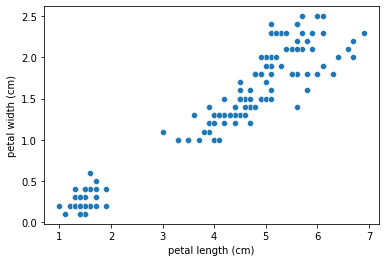

In [63]:
graficar(df_data)

In [ ]:
# Almuno: Utilizar la función generada para graficar la relación con dada dataframe de cada especie

nro columna eje x2
nro columna eje y3


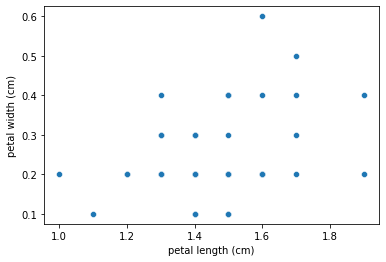

In [65]:
graficar(df_setosa)

nro columna eje x2
nro columna eje y3


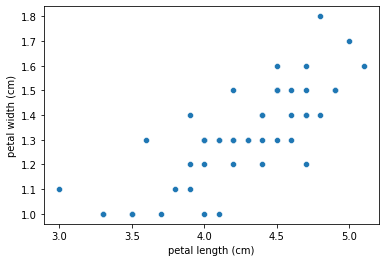

In [66]:
graficar(df_versicolor)


nro columna eje x2
nro columna eje y3


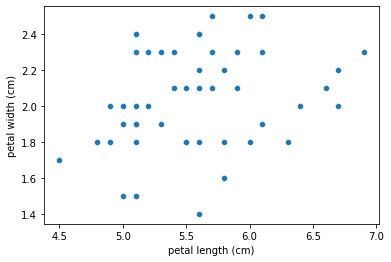

In [67]:
graficar(df_virginica)